We'll use the [Iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) to study some of the clustering algorithms available in `scikit-learn`. It contains various measurements for 150 flowers belonging to 3 different species.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_style('darkgrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
iris_df = sns.load_dataset('iris')

In [3]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris_df["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

See the difference here: https://editor.analyticsvidhya.com/uploads/51518iris%20img1.png

<Axes: xlabel='sepal_width', ylabel='sepal_length'>

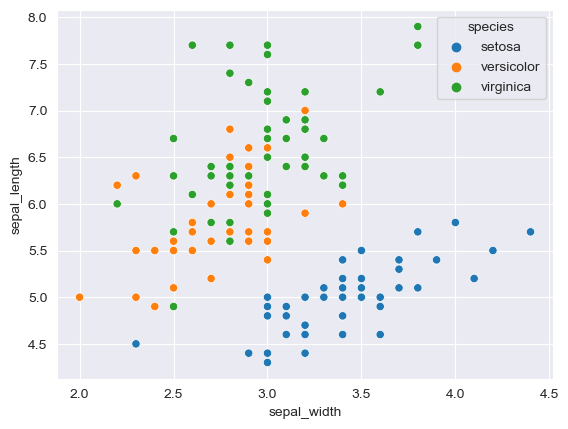

In [6]:
sns.scatterplot(data=iris_df, x='sepal_width', y='sepal_length', hue='species')

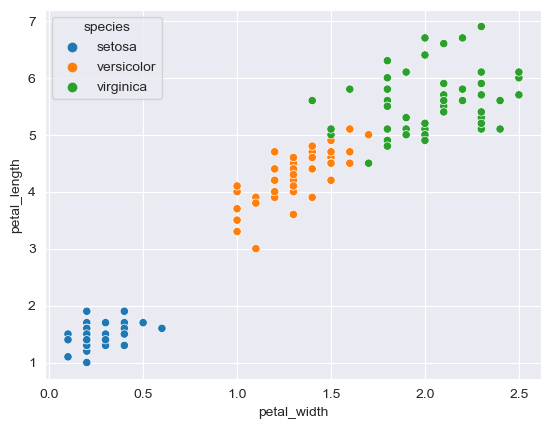

In [7]:
sns.scatterplot(data=iris_df, x='petal_width', y='petal_length', hue='species');

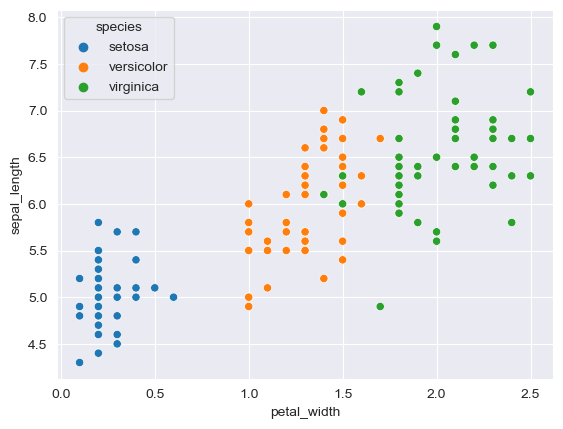

In [8]:
sns.scatterplot(data=iris_df, x='petal_width', y='sepal_length', hue='species');

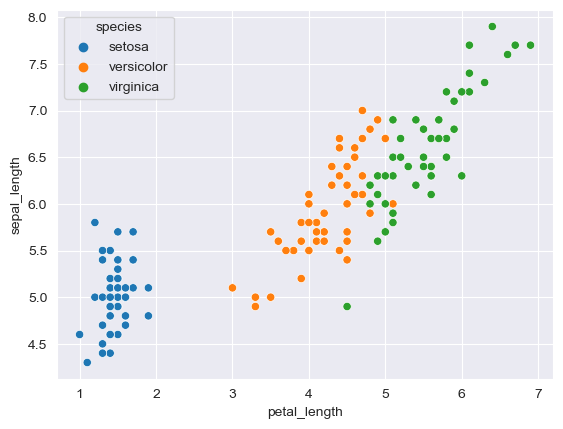

In [9]:
sns.scatterplot(data=iris_df, x='petal_length', y='sepal_length', hue='species');

We'll attempt to cluster observations using numeric columns in the data. 

In [10]:
numeric_cols = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

In [11]:
X = iris_df[numeric_cols]

Let's apply K-means clustering to the Iris dataset.

In [12]:
from sklearn.cluster import KMeans

In [13]:
model = KMeans(n_clusters=5, random_state=42)

In [14]:
model.fit(X)

KMeans(n_clusters=5, random_state=42)

We can check the cluster centers for each cluster.

In [15]:
model.cluster_centers_

array([[7.475     , 3.125     , 6.3       , 2.05      ],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.508     , 2.6       , 3.908     , 1.204     ],
       [6.20769231, 2.85384615, 4.74615385, 1.56410256],
       [6.52916667, 3.05833333, 5.50833333, 2.1625    ]])

In [16]:
model.cluster_centers_[:,0]

array([7.475     , 5.006     , 5.508     , 6.20769231, 6.52916667])

In [17]:
model.cluster_centers_[:,2]

array([6.3       , 1.462     , 3.908     , 4.74615385, 5.50833333])

We can now classify points using the model.

In [18]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
preds = model.predict(X)
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3,
       3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 4, 3, 0, 4, 4, 0, 2, 0, 4, 0,
       4, 4, 4, 3, 4, 4, 4, 0, 0, 3, 4, 3, 0, 3, 4, 0, 3, 3, 4, 0, 0, 0,
       4, 3, 3, 0, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 3])

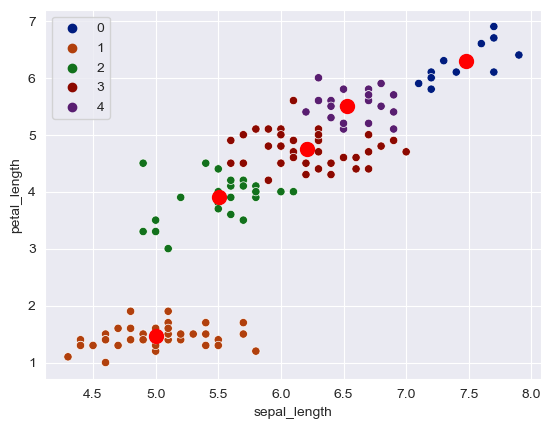

In [20]:
sns.scatterplot(data=X, x='sepal_length', y='petal_length', hue=preds, palette='dark');
centers_x, centers_y = model.cluster_centers_[:,0], model.cluster_centers_[:,2]
plt.plot(centers_x, centers_y, 'or', markersize=10)

As you can see, K-means algorithm was able to classify (for the most part) different specifies of flowers into separate clusters. Note that we did not provide the "species" column as an input to `KMeans`.

We can check the "goodness" of the fit by looking at `model.inertia_`, which contains the sum of squared distances of samples to their closest cluster center. Lower the inertia, better the fit.

In [21]:
model.inertia_

46.44618205128205

In most real-world scenarios, there's no predetermined number of clusters. In such a case, you can create a plot of "No. of clusters" vs "Inertia" to pick the right number of clusters.

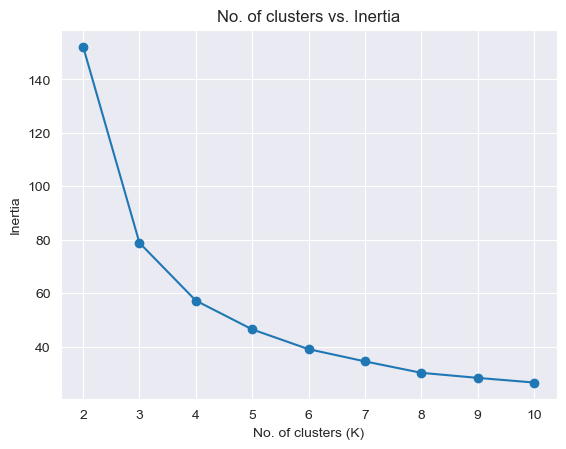

In [22]:
options = range(2,11)
inertias = []

for n_clusters in options:
    model = KMeans(n_clusters, random_state=42).fit(X)
    inertias.append(model.inertia_)
    
plt.title("No. of clusters vs. Inertia")
plt.plot(options, inertias, '-o')
plt.xlabel('No. of clusters (K)')
plt.ylabel('Inertia');

The chart creates an "elbow" plot, and you can pick the number of clusters beyond which the reduction in inertia decreases slowly.

🛍️ We applied the powerful techniques of unsupervised learning to the “Mall_Customers” dataset from Kaggle, uncovering fascinating insights and patterns in the data


In [23]:
mall_df = pd.read_csv("Mall_Customers.csv")

In [24]:
mall_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [25]:
mall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [26]:
mall_df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

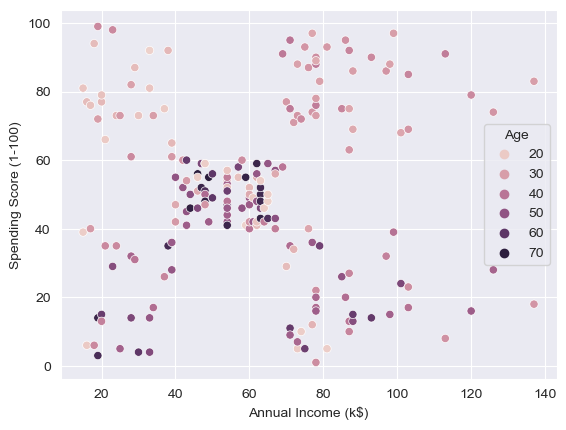

In [27]:
 sns.scatterplot(data=mall_df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Age');

In [28]:
mall_model = KMeans(n_clusters=4, random_state=42)

In [29]:
mall_numeric_cols = ['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [30]:
M = mall_df[mall_numeric_cols]

In [31]:
mall_model.fit(M)

KMeans(n_clusters=4, random_state=42)

In [32]:
mall_model.cluster_centers_

array([[164.        ,  40.80555556,  87.91666667,  17.88888889],
       [ 30.06779661,  36.10169492,  29.86440678,  49.86440678],
       [ 92.48484848,  43.87878788,  57.72727273,  49.25757576],
       [162.        ,  32.69230769,  86.53846154,  82.12820513]])

In [33]:
M

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40
...,...,...,...,...
195,196,35,120,79
196,197,45,126,28
197,198,32,126,74
198,199,32,137,18


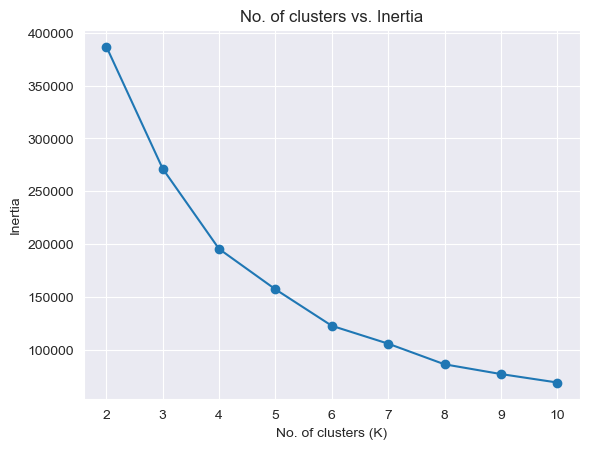

In [34]:
options = range(2,11)
inertias = []

for n_clusters in options:
    model = KMeans(n_clusters, random_state=42).fit(M)
    inertias.append(model.inertia_)
    
plt.title("No. of clusters vs. Inertia")
plt.plot(options, inertias, '-o')
plt.xlabel('No. of clusters (K)')
plt.ylabel('Inertia');

In [35]:
model.inertia_

68852.23356001996

In [36]:
model_M = KMeans(n_clusters=6, random_state=42).fit(M)

In [37]:
pred_m = model.predict(M)
pred_m

array([6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4,
       6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 1, 4, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 1, 1, 9, 1, 9, 9, 9, 1,
       1, 9, 1, 1, 9, 9, 9, 9, 9, 3, 9, 9, 3, 9, 9, 9, 9, 9, 3, 9, 9, 3,
       3, 9, 9, 3, 8, 3, 3, 3, 8, 3, 8, 3, 3, 8, 8, 3, 8, 3, 8, 8, 8, 8,
       8, 3, 8, 3, 3, 3, 8, 8, 8, 8, 3, 8, 8, 7, 0, 7, 8, 7, 0, 7, 0, 7,
       0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7,
       0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2])

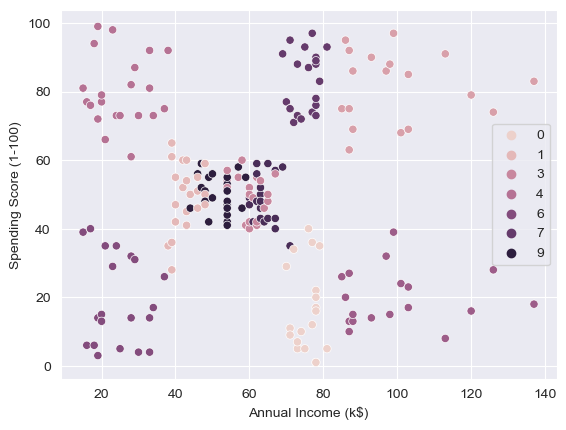

In [38]:
sns.scatterplot(data=M, x='Annual Income (k$)', y='Spending Score (1-100)', hue=pred_m);

In [39]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [6]:
ping_df = sns.load_dataset('penguins')
ping_df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

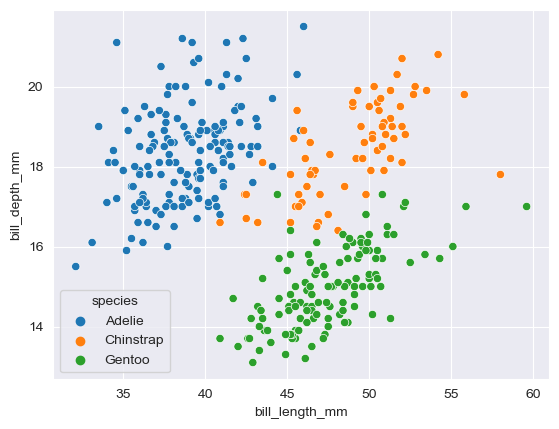

In [7]:
sns.scatterplot(data=ping_df, x='bill_length_mm', y='bill_depth_mm', hue='species');


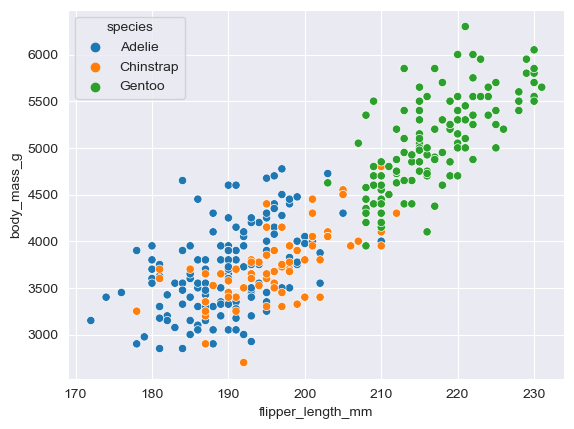

In [8]:
sns.scatterplot(data=ping_df, x='flipper_length_mm', y='body_mass_g', hue='species');